Training MSE at lambda=0.1:
  Ridge:      0.5101
  Lasso:      0.5900
  ElasticNet: 0.5548


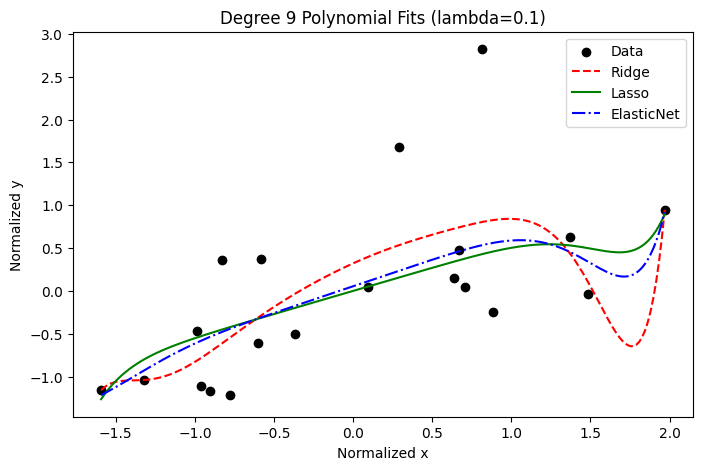

/home/aliakbar/Desktop/uni/ml/hw2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.085e+00, tolerance: 2.000e-03
  model = cd_fast.enet_coordinate_descent(
/home/aliakbar/Desktop/uni/ml/hw2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.096e+00, tolerance: 2.000e-03
  model = cd_fast.enet_coordinate_descent(
/home/aliakbar/Desktop/uni/ml/hw2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

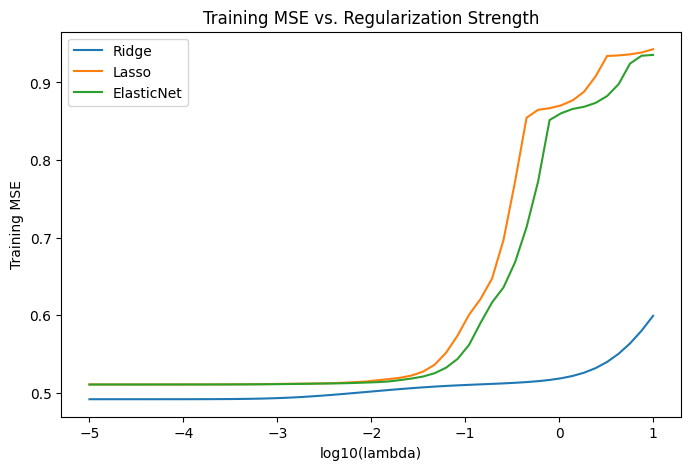

In [1]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load and subsample dataset (same as above)
housing = fetch_california_housing()
x = housing.data[:, 0]  # MedInc
y = housing.target

np.random.seed(45)  # Do not change
idx = np.random.choice(len(x), 20, replace=False)
x = x[idx]
y = y[idx]

# Normalize x and y for numerical stability
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

# 1. Build the polynomial design matrix (degree 9)
degree = 9
Phi = np.column_stack([x**i for i in range(degree+1)])
# Shape: (20, 10)

# 2. Pick a single lambda value for initial comparison
lam = 0.1

# --- Ridge Regression ---
ridge_model = Ridge(alpha=lam, fit_intercept=False)
ridge_model.fit(Phi, y)
y_pred_ridge = ridge_model.predict(Phi)
mse_ridge = np.mean((y - y_pred_ridge)**2)

# --- Lasso Regression ---
lasso_model = Lasso(alpha=lam, fit_intercept=False, max_iter=10000)
lasso_model.fit(Phi, y)
y_pred_lasso = lasso_model.predict(Phi)
mse_lasso = np.mean((y - y_pred_lasso)**2)

# --- Elastic Net ---
# l1_ratio=0.5 means half L1, half L2 penalty (you can adjust as desired)
en_model = ElasticNet(alpha=lam, l1_ratio=0.5, fit_intercept=False, max_iter=10000)
en_model.fit(Phi, y)
y_pred_en = en_model.predict(Phi)
mse_en = np.mean((y - y_pred_en)**2)

print(f"Training MSE at lambda={lam}:")
print(f"  Ridge:      {mse_ridge:.4f}")
print(f"  Lasso:      {mse_lasso:.4f}")
print(f"  ElasticNet: {mse_en:.4f}")

# 3. Plotting the fits for each model (lambda=0.1)
x_plot = np.linspace(x.min(), x.max(), 200)
Phi_plot = np.column_stack([x_plot**i for i in range(degree+1)])

y_plot_ridge = ridge_model.predict(Phi_plot)
y_plot_lasso = lasso_model.predict(Phi_plot)
y_plot_en    = en_model.predict(Phi_plot)

plt.figure(figsize=(8,5))
plt.scatter(x, y, color='black', label='Data')
plt.plot(x_plot, y_plot_ridge, 'r--', label='Ridge')
plt.plot(x_plot, y_plot_lasso, 'g-', label='Lasso')
plt.plot(x_plot, y_plot_en, 'b-.', label='ElasticNet')
plt.xlabel("Normalized x")
plt.ylabel("Normalized y")
plt.title("Degree 9 Polynomial Fits (lambda=0.1)")
plt.legend()
plt.show()

# 4. Compute MSE vs. lambda for each model over a range of lambdas
lam_range = np.logspace(-5, 1, 50)
mse_ridge_list = []
mse_lasso_list = []
mse_en_list    = []

for lam_ in lam_range:
    # Ridge
    ridge_temp = Ridge(alpha=lam_, fit_intercept=False)
    ridge_temp.fit(Phi, y)
    mse_ridge_list.append(np.mean((y - ridge_temp.predict(Phi))**2))

    # Lasso
    lasso_temp = Lasso(alpha=lam_, fit_intercept=False, max_iter=10000)
    lasso_temp.fit(Phi, y)
    mse_lasso_list.append(np.mean((y - lasso_temp.predict(Phi))**2))

    # Elastic Net
    en_temp = ElasticNet(alpha=lam_, l1_ratio=0.5, fit_intercept=False, max_iter=10000)
    en_temp.fit(Phi, y)
    mse_en_list.append(np.mean((y - en_temp.predict(Phi))**2))

# 5. Plot the training MSE vs. log10(lambda)
plt.figure(figsize=(8,5))
plt.plot(np.log10(lam_range), mse_ridge_list, label='Ridge')
plt.plot(np.log10(lam_range), mse_lasso_list, label='Lasso')
plt.plot(np.log10(lam_range), mse_en_list, label='ElasticNet')
plt.xlabel("log10(lambda)")
plt.ylabel("Training MSE")
plt.title("Training MSE vs. Regularization Strength")
plt.legend()
plt.show()
